# Content and Objective
+ Show probability when sampling random bits

# Import

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Simulation

In [3]:
# define probability of binary 1
p = 0.5

# lengths of sequences
N_seq_1 = 50
N_seq_2 = 10000


# sample uniformly in [0,1]
S_1 = np.random.rand( N_seq_1 )
S_2 = np.random.rand( N_seq_2 )

# map to bits with prob. as defined 
X_1 = [ int( s > 1-p ) for s in S_1 ]
X_2 = [ int( s > 1-p ) for s in S_2 ]

# NOTE:
# Simulation could also be done by 
#X_1 = np.random.choice( [0, 1], size=N_seq_1, replace=True, p=[1-p,p] )
#X_2 = np.random.choice( [0, 1], size=N_seq_2, replace=True, p=[1-p,p] )


# determine histogram manually
bins = np.array( [0, 1] )

hist_1 = [ ( N_seq_1 - np.sum( X_1 ) ) / N_seq_1,  np.sum( X_1 ) / N_seq_1]
hist_2 = [ ( N_seq_2 - np.sum( X_2 ) ) / N_seq_2,  np.sum( X_2 ) / N_seq_2]

# get expectation and standard deviation
E_1 = np.average( X_1 )
V_1 = np.sqrt( np.var( X_1 ) )

E_2 = np.average( X_2 )
V_2 = np.sqrt( np.var( X_2 ) )    


# theoretical values
f_theo_x = [ 1-p, p ]     

# Plotting

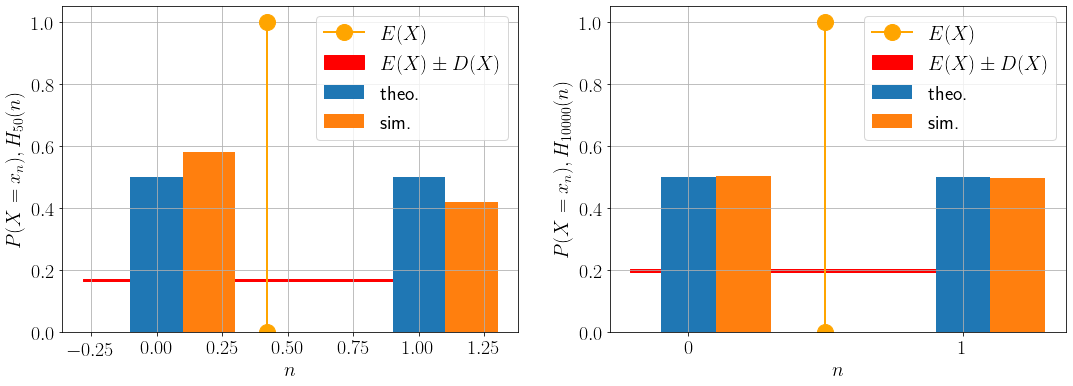

In [4]:
# plotting
plt.figure()

width = 0.2

plt.subplot(121)
plt.bar( bins, f_theo_x, linewidth=2.0, width=width, label='theo.')
plt.bar( bins + width, hist_1, linewidth=2.0, width=width, label='sim.' )

plt.plot( [ E_1, E_1 ],  [0, np.max(X_1)] , '-o', color='orange', ms = 16, linewidth=2.0, label='$E(X)$' )
plt.fill_between( [ E_1 - np.sqrt(V_1), E_1 + np.sqrt(V_1)], np.average(X_1) * .39, np.average(X_1)*0.41, color='r', label='$E(X)\pm D(X)$')        

plt.xlabel('$n$')
plt.ylabel('$P(X=x_n), H_{{{}}}(n)$'.format( N_seq_1 ) )
                    
plt.grid( True )
plt.legend( loc = 'upper right' )
 


plt.subplot(122)
plt.bar( bins, f_theo_x, linewidth=2.0, width=width, label='theo.')
plt.bar( bins + width, hist_2, linewidth=2.0, width=width, label='sim.' )

plt.plot( [ E_2, E_2 ],  [0, np.max(X_2)] , '-o', color='orange', ms = 16, linewidth=2.0, label='$E(X)$' )
plt.fill_between( [ E_2 - np.sqrt(V_2), E_1 + np.sqrt(V_2)], np.average(X_2) * .39, np.average(X_2)*0.41, color='r', label='$E(X)\pm D(X)$')        

plt.xticks( [0,1])
plt.xlabel('$n$')
plt.ylabel('$P(X=x_n), H_{{{}}}(n)$'.format( N_seq_2 ) )
plt.grid( True )
plt.legend( loc = 'upper right' )   